<a href="https://colab.research.google.com/github/mayowa-data/C7082/blob/main/Assessment_for_C7082_ipynb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This the continuation of the initial experiment, reducing the batch size to 
90 X 90

Import the libraries again as done in the first noote book.


In [ ]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential
import keras  
import os
import glob 
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
from skimage import io 
from os import listdir
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

Importing and Loading data into dataframe from files in drive mounted on google collab

In [ ]:
crops_dir = '/content/drive/MyDrive/Agricultural-crops'
crops_dir = os.path.join(crops_dir)
crops_dir= glob.glob(crops_dir)



Define parameters for the loader

In [ ]:
batch_size = 32
img_height = 90
img_width =  90

Split the data for Training and Testing 60% for training and 40% for testing
It is important to split data.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Agricultural-crops',
validation_split=0.4,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size= batch_size)

Found 770 files belonging to 30 classes.
Using 462 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Agricultural-crops',
  validation_split=0.4,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 770 files belonging to 30 classes.
Using 308 files for validation.


Print the class name for the dataset

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Cherry', 'Coffee-plant', 'Cucumber', 'Fox_nut(Makhana)', 'Lemon', 'Olive-tree', 'Pearl_millet(bajra)', 'Tobacco-plant', 'almond', 'banana', 'cardamom', 'chilli', 'clove', 'coconut', 'cotton', 'gram', 'jowar', 'jute', 'maize', 'mustard-oil', 'papaya', 'pineapple', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'tea', 'tomato', 'vigna-radiati(Mung)', 'wheat']


Visualize the data

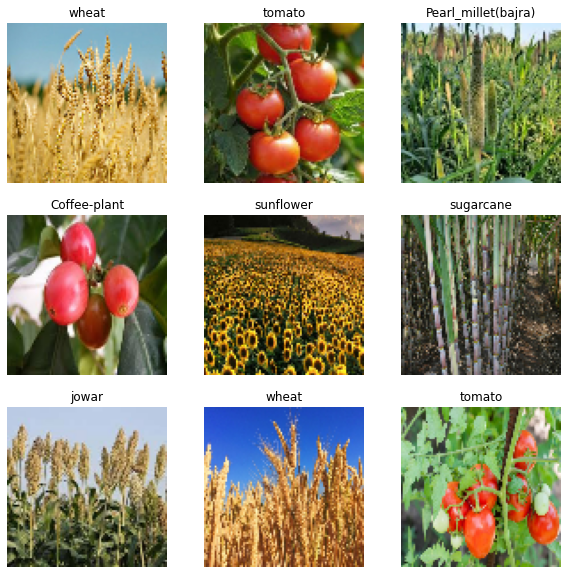

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Iterate over the dataset and retrieve batches of images

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 90, 90, 3)
(32,)


Autotune your data to optimize performance d

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Standardize the data

Reduce the RGB channel values to between [0,1] to make it ideal for neural network

In [ ]:
normalization_layer = layers.Rescaling(1./255)

Apply normalization to the dataset by callinng Dataset.map

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.047407642 1.0


Create the model
The Keras Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu').

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile the model
I am choosing the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model summary
View all the layers of the network using the Keras Model.summary method:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 90, 90, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 90, 90, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 45, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        1

Train the model
Train the model for 15 epochs with the Keras Model.fit method:

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
15/15 [==============================] - 107s 7s/step - loss: 3.4165 - accuracy: 0.0390 - val_loss: 3.4056 - val_accuracy: 0.0455
Epoch 2/15
15/15 [==============================] - 0s 12ms/step - loss: 3.3470 - accuracy: 0.0823 - val_loss: 3.3583 - val_accuracy: 0.0552
Epoch 3/15
15/15 [==============================] - 0s 13ms/step - loss: 3.2263 - accuracy: 0.0996 - val_loss: 3.2437 - val_accuracy: 0.0812
Epoch 4/15
15/15 [==============================] - 0s 12ms/step - loss: 3.1102 - accuracy: 0.1212 - val_loss: 3.2072 - val_accuracy: 0.1071
Epoch 5/15
15/15 [==============================] - 0s 10ms/step - loss: 2.9117 - accuracy: 0.1558 - val_loss: 3.0443 - val_accuracy: 0.1234
Epoch 6/15
15/15 [==============================] - 0s 10ms/step - loss: 2.6503 - accuracy: 0.2771 - val_loss: 2.9281 - val_accuracy: 0.1461
Epoch 7/15
15/15 [==============================] - 0s 9ms/step - loss: 2.3348 - accuracy: 0.3571 - val_loss: 2.9918 - val_accuracy: 0.1623
Epoch 8/15
15/

Visualize training results

See the result of the training by creating plots of the loss and accuracy on the training and validation sets:

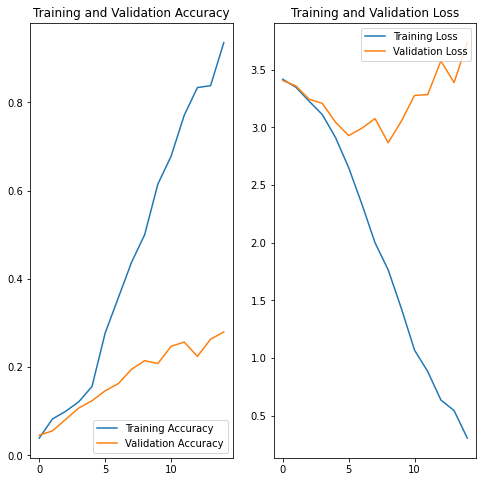

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 28% accuracy on the validation set. 
There is an overfitting in the plots above, the training accuracy 94% is increasing linearly over time, whereas validation accuracy stalls around 28% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable.
 
Now we check what is wrong and try to improve the overall performance


Data Augumentation

Data Augumentation This helps with the overfitting problem by generating more training data from your existing dataset by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

we will activate data augmentation using the following Keras preprocessing layers: tf.keras.layers.RandomFlip, tf.keras.layers.RandomRotation, and tf.keras.layers.RandomZoom. These can be included inside your model like other layers, and run on the GPU.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Visualize a few augmented examples by applying data augmentation to the same image several times

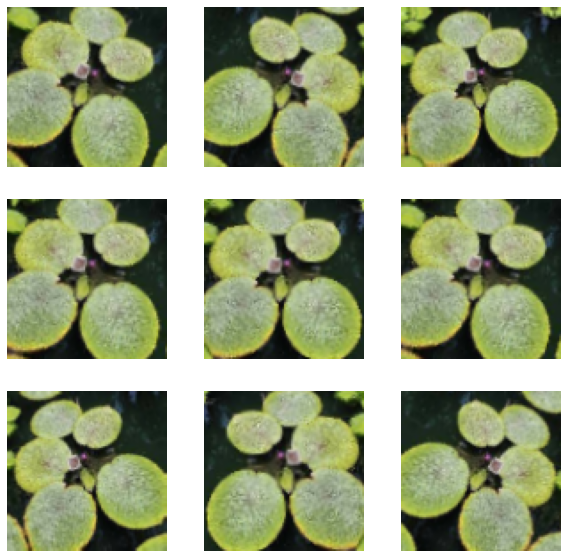

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Dropout We can also reduce overfitting  by introducing Dropout to regularize the network.
When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 90, 90, 3)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 90, 90, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                  

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
15/15 [==============================] - 1s 36ms/step - loss: 3.4232 - accuracy: 0.0325 - val_loss: 3.3878 - val_accuracy: 0.0519
Epoch 2/20
15/15 [==============================] - 0s 29ms/step - loss: 3.3373 - accuracy: 0.0866 - val_loss: 3.3550 - val_accuracy: 0.0584
Epoch 3/20
15/15 [==============================] - 0s 27ms/step - loss: 3.2085 - accuracy: 0.0974 - val_loss: 3.3226 - val_accuracy: 0.0649
Epoch 4/20
15/15 [==============================] - 1s 41ms/step - loss: 3.0711 - accuracy: 0.1364 - val_loss: 3.2107 - val_accuracy: 0.0877
Epoch 5/20
15/15 [==============================] - 1s 33ms/step - loss: 2.9280 - accuracy: 0.1623 - val_loss: 3.0380 - val_accuracy: 0.1039
Epoch 6/20
15/15 [==============================] - 1s 49ms/step - loss: 2.7426 - accuracy: 0.2359 - val_loss: 2.9680 - val_accuracy: 0.1461
Epoch 7/20
15/15 [==============================] - 0s 30ms/step - loss: 2.6785 - accuracy: 0.2229 - val_loss: 2.8422 - val_accuracy: 0.1753
Epoch 8/20
15

The Training accuracy droped to 57% from 94%  the validation accuracy is 27%.

Visualize training results
After applying data augmentation and tf.keras.layers.Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned:

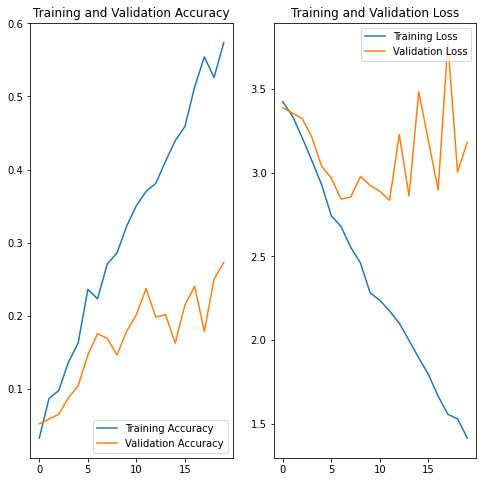

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
almond_dir = '/content/drive/MyDrive/Agricultural-crops/almond/image (11).jpg'
almond_path = os.path.join('/content/drive/MyDrive/Agricultural-crops/almond')
from PIL import Image
img_data = np.random.random(size=(90, 90, 3))
img = tf.keras.preprocessing.image.array_to_img(img_data)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 15ms/step
This image most likely belongs to almond with a 35.33 percent confidence.


Predict on new data

Use TensorFlow Lite
TensorFlow Lite is a set of tools that enables on-device machine learning by helping developers run their models on mobile, embedded, and edge devices.

Convert the Keras Sequential model to a TensorFlow Lite model
To use the trained model with on-device applications, first convert it to a smaller and more efficient model format called a TensorFlow Lite model.

Here, we will take the trained Keras Sequential model and use tf.lite.TFLiteConverter.from_keras_model to generate a TensorFlow Lite model:

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Run the TensorFlow Lite model
You can access the TensorFlow Lite saved model signatures in Python via the tf.lite.Interpreter class.

Load the model with the Interpreter:

In [ ]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

Print the signatures from the converted model to obtain the names of the inputs (and outputs):

In [ ]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

Test the loaded TensorFlow Model by performing inference on a sample image with tf.lite.Interpreter.get_signature_runner by passing the signature name as follows:

In [ ]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

We have already tensorized that image and saved it as img_array. Now, pass it to the first argument (the name of the 'inputs') of the loaded TensorFlow Lite model (predictions_lite), compute softmax activations, and then print the prediction for the class with the highest computed probability.

In [ ]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to almond with a 35.33 percent confidence.


In [ ]:
print(np.max(np.abs(predictions - predictions_lite)))

2.861023e-06
